<a href="https://colab.research.google.com/github/Harene-M/Decision-Tree-of-Iris-Dataset-In-Python/blob/main/iris_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [ ]:
# Load the Iris dataset to a variable
iris = load_iris()
# Load the data into 2 different pandas dataframes. 
# X for the features
X = pd.DataFrame(iris.data, columns=iris.feature_names)
# y for the targets
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [ ]:
# Let's explore our features.
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
print(y)


['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [ ]:
# Convert categorical data into dummy/indicator variables.
y = pd.get_dummies(y)

In [ ]:
y.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
# import the function
from sklearn.model_selection import train_test_split

# Split our data into the training sets and the testing sets
# Each set has a pair of X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
## Import and create the model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Train our model with our training data.
dt.fit(X_train, y_train)

DecisionTreeClassifier()

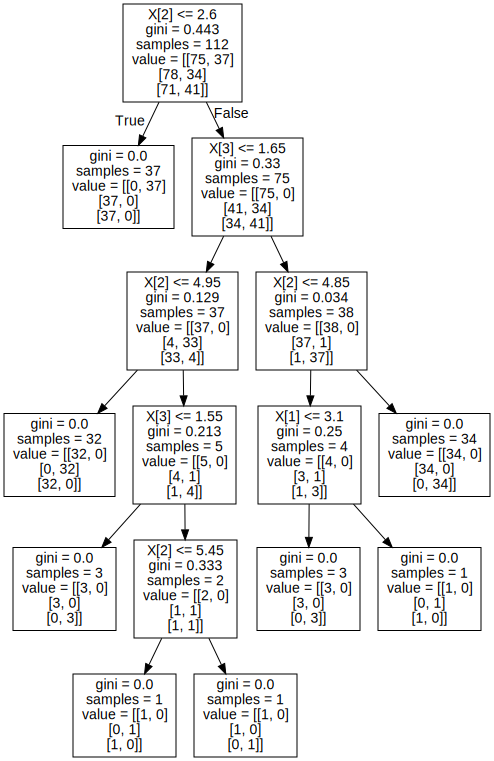

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

display(graphviz.Source(export_graphviz(dt)))

In [ ]:
# Call the .predict() function of the model and feed in the testing data
y_pred = dt.predict(X_test)

In [ ]:
# To analyze the accuarcy of our models predictions we are going to use a confusion matrix. You can read more about this matrix online, but basically we want
# know how many samples of each type were correctly classified. The matrix is going to tell us how many samples of each type were classified and to which target type.

from sklearn.metrics import confusion_matrix
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])